In [315]:
# Downloading dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/traffic-accident-prediction")
dataset = "dataset_traffic_accident_prediction1.csv"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\testk\.cache\kagglehub\datasets\denkuznetz\traffic-accident-prediction\versions\1


In [316]:
# Reading dataset with pandas

import pandas as pd
df = pd.read_csv(f'{path}/{dataset}', encoding = "ISO-8859-1")
df.head(20)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [317]:
# Dataset statistics

print(df.describe())
print(df.info())
print(df.isnull().values.any())

       Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       798.000000   798.000000          798.000000      798.000000   
mean          1.001253    71.050125            3.286967        0.160401   
std           0.784894    32.052458            2.017267        0.367208   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  798.000000         798.000000  798.000000  
mean    43.259398          38.981203    0.299499  
std     15.129856          15.273201    0.458326  
min     18.000000           9.000000    0.000000  
25%     30.000000          26.000000    0.000000  
50%     43.000000 

In [318]:
# Getting rid of NaN values either by placing mean of the column or dropping it entirely

df['Driver_Experience'] = df['Driver_Experience'].fillna(df['Driver_Experience'].mean()).astype(int)
df['Speed_Limit'] = df['Speed_Limit'].fillna(df['Speed_Limit'].mean()).astype(int)
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean()).astype(int)
df['Driver_Alcohol'] = df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mean()).astype(int)

df = df.dropna()
len(df)
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1.0,60,4,0,Low,Icy,Car,54.0,52,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60,3,0,Low,Under Construction,Bus,34.0,31,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195,11,0,Low,Dry,Car,62.0,55,Artificial Light,1.0
6,Foggy,Highway,Afternoon,0.0,60,4,0,Low,Dry,Truck,27.0,26,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60,4,0,Low,Dry,Car,29.0,22,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,Rainy,Rural Road,Afternoon,0.0,71,4,0,Moderate,Dry,Car,53.0,45,Daylight,0.0
835,Clear,Highway,Night,2.0,30,4,0,Low,Dry,Car,23.0,15,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60,4,0,Low,Dry,Motorcycle,52.0,46,Daylight,1.0
838,Foggy,Highway,Afternoon,2.0,60,3,0,Low,Dry,Car,25.0,19,Artificial Light,0.0


In [319]:
# One-Hot Encoding

weather = pd.get_dummies(table['Weather'])
table = pd.merge(
    left=df,
    right=weather,
    left_index=True,
    right_index=True,
)

road_type = pd.get_dummies(table['Road_Type'])
table = pd.merge(
    left=table,
    right=road_type,
    left_index=True,
    right_index=True,
)

time_of_day = pd.get_dummies(table['Time_of_Day'])
table = pd.merge(
    left=table,
    right=time_of_day,
    left_index=True,
    right_index=True,
)

road_condition = pd.get_dummies(table['Road_Condition'])
table = pd.merge(
    left=table,
    right=road_condition,
    left_index=True,
    right_index=True,
)

day_light_condition = pd.get_dummies(table['Road_Light_Condition'])
table = pd.merge(
    left=table,
    right=day_light_condition,
    left_index=True,
    right_index=True,
)

vehicle_type = pd.get_dummies(table['Vehicle_Type'])
table = pd.merge(
    left=table,
    right=vehicle_type,
    left_index=True,
    right_index=True,
)

table.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident', 'Clear', 'Foggy', 'Rainy', 'Snowy',
       'Stormy', 'City Road', 'Highway', 'Mountain Road', 'Rural Road',
       'Afternoon', 'Evening', 'Morning', 'Night', 'Dry', 'Icy',
       'Under Construction', 'Wet', 'Artificial Light', 'Daylight', 'No Light',
       'Bus', 'Car', 'Motorcycle', 'Truck'],
      dtype='object')

In [320]:
#Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
import sklearn.utils as skut

# train_x, test_x, train_y, test_y = train_test_split(table[['Traffic_Density', 'Speed_Limit',
#        'Number_of_Vehicles', 'Driver_Alcohol',
#        'Driver_Age', 'Driver_Experience',
#        'Clear', 'Foggy', 'Rainy', 'Snowy',
#        'Stormy', 'City Road', 'Highway', 'Mountain Road', 'Rural Road',
#        'Afternoon', 'Evening', 'Morning', 'Night', 'Dry', 'Icy',
#        'Under Construction', 'Wet', 'Artificial Light', 'Daylight', 'No Light',
#        'Bus', 'Car', 'Motorcycle', 'Truck']], table[['Accident']].astype(int), test_size=0.3, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(table[['Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol',
       'Driver_Age', 'Driver_Experience',
       'Clear', 'Foggy', 'Rainy', 'Snowy',
       'Stormy', 'Dry', 'Icy',
       'Under Construction', 'Wet', 'Artificial Light', 'Daylight', 'No Light',
       'Bus', 'Car', 'Motorcycle', 'Truck']], table[['Accident']].astype(int), test_size=0.3, random_state=42)

In [321]:
import numpy as np
import matplotlib.pyplot as plt

y_len = len(train_y)
y_classes_len = np.bincount(train_y['Accident'])

w = y_len / (y_classes_len * 2)
w = {0: w[0], 1: w[1]}

In [322]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, r2_score
from IPython.display import Markdown

METRICS = [
    (f1_score, "f1_score"),
    (precision_score, "precision_score"),
    (recall_score, "recall_score"),
    (r2_score, "r2_score")
]
    
def displmd(*args, **kwargs):
    display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

def validate(y_pred_test, y_pred_train, train_y, test_y, title="Validation"):
    outcomes = []

    for m, name in METRICS:
        outcomes.append([name, m(test_y, y_pred_test), m(train_y, y_pred_train)])

    df = pd.DataFrame(outcomes, columns=['metric', 'test', 'train'])
    df = df.set_index('metric')
    
    displmd(
        f"# {title}",
        f"## Valitation output",
        df.to_markdown()
    )

    cm_test = confusion_matrix(test_y, y_pred_test)
    cm_train = confusion_matrix(train_y, y_pred_train)
    
    fig, axs = plt.subplots(1, 2)

    # set size
    fig.set_size_inches(12, 5)

    axs[0].set_title('Test Confusion Matrix')
    axs[0].matshow(cm_test, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_test):
        axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    axs[1].set_title('Train Confusion Matrix')
    axs[1].matshow(cm_train, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_train):
        axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
    plt.show()

In [323]:
w

{0: 0.7204081632653061, 1: 1.6342592592592593}

# SVM - linear kernel - weighted for depth: 9, leafs: 9

## Valitation output

| metric          |      test |     train |
|:----------------|----------:|----------:|
| f1_score        |  0.457143 |  0.581673 |
| precision_score |  0.40678  |  0.51049  |
| recall_score    |  0.521739 |  0.675926 |
| r2_score        | -0.776866 | -0.400794 |

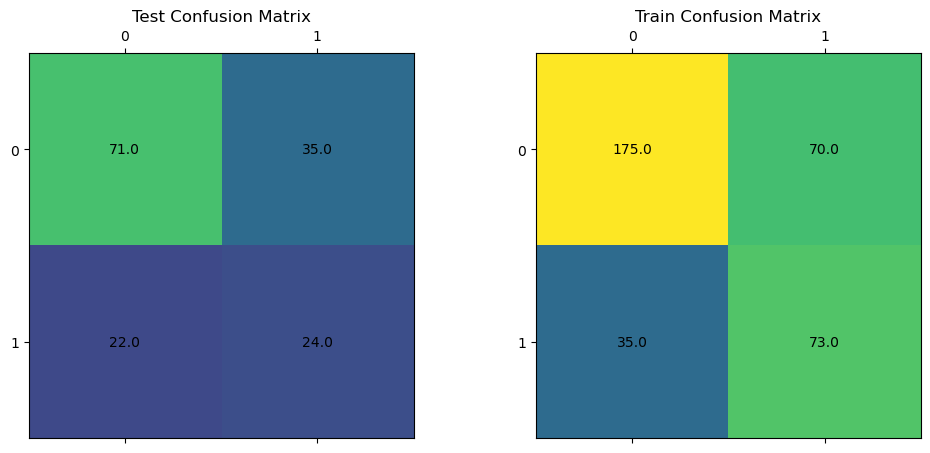

In [ ]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model_svr_rbf = Pipeline([
        ('norm', StandardScaler()),
        ('regr', RandomForestClassifier(max_depth=7, class_weight="balanced", max_leaf_nodes=5, n_estimators=10))])

w = np.array([w[i] for i in train_y['Accident']])
model_svr_rbf.fit(train_x, np.array(train_y).reshape(-1), regr__sample_weight=w)

validate(model_svr_rbf.predict(test_x), model_svr_rbf.predict(train_x), train_y, test_y, title=f"SVM - linear kernel - weighted for depth: {i}, leafs: {j}")